In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Charger les données depuis le fichier CSV
telecom_df = pd.read_csv('../datasets/Telecom-Data-1.csv', nrows=500, sep=';', header=0)

# Afficher les 10 premières lignes du dataframe
telecom_df.head(5)


,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation electronique,Mode de paiement,charges mensuelles,Charges totales,Desabonnement
0,1,Femme,0,Non,1,Non,DSL,Non,Oui,Mensuel,Oui,Cheque electronique,"29,85","29,85",Non
1,2,Homme,0,Non,34,Non,DSL,Oui,Non,Annuel,Non,Cheque papier,"56,95","1889,5",Non
2,3,Homme,0,Non,2,Non,DSL,Oui,Non,Mensuel,Oui,Cheque papier,"53,85","108,15",Oui
3,4,Homme,0,Non,45,Non,DSL,Non,Non,Annuel,Non,Virement bancaire,"42,3","1840,75",Non
4,5,Femme,0,Non,2,Non,Fibre optique,Oui,Non,Mensuel,Oui,Cheque electronique,"70,7","151,65",Oui


## Analyse Exploratoire des Données (EDA) avant le pretraitement

In [3]:
# Explorer les statistiques descriptives
descriptive_stats = telecom_df.describe()
descriptive_stats

,ID,Senior,Anciennete
count,500.000000,500.000000,500.00000
mean,291.794000,0.178000,31.79400
std,169.820097,0.382896,24.54703
min,1.000000,0.000000,0.00000
25%,142.750000,0.000000,8.00000
50%,293.500000,0.000000,28.00000
75%,438.250000,0.000000,55.00000
max,584.000000,1.000000,72.00000


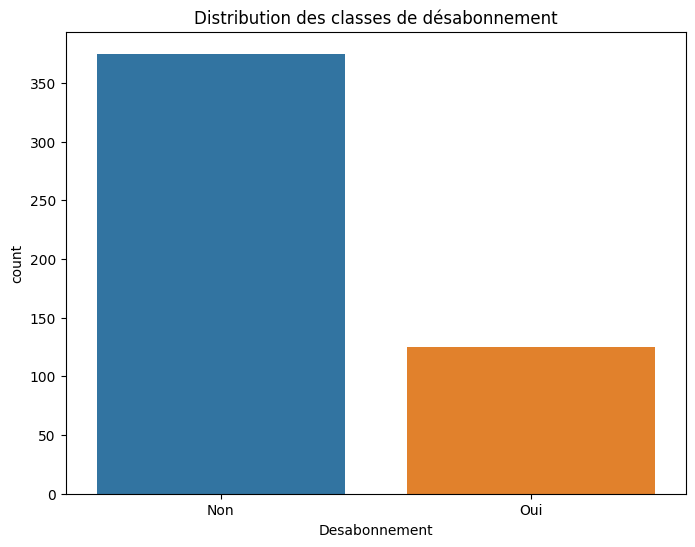

In [4]:
# Visualiser la distribution des classes de désabonnement
plt.figure(figsize=(8, 6))
sns.countplot(x='Desabonnement', data=telecom_df)
plt.title('Distribution des classes de désabonnement')
plt.show()

## Prétraitement des Données
---

### Gestion valeurs manquantes

In [5]:
# Renommer les colonnes si nécessaire
telecom_df.columns = ['ID', 'Genre', 'Senior', 'Enfants', 'Anciennete', 'Multi-lignes', 'Service Internet', 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement', 'Charges mensuelles', 'Charges totales', 'Desabonnement']

# Afficher les 10 premières lignes du dataframe
telecom_df.head(5)


,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation électronique,Mode de paiement,Charges mensuelles,Charges totales,Desabonnement
0,1,Femme,0,Non,1,Non,DSL,Non,Oui,Mensuel,Oui,Cheque electronique,"29,85","29,85",Non
1,2,Homme,0,Non,34,Non,DSL,Oui,Non,Annuel,Non,Cheque papier,"56,95","1889,5",Non
2,3,Homme,0,Non,2,Non,DSL,Oui,Non,Mensuel,Oui,Cheque papier,"53,85","108,15",Oui
3,4,Homme,0,Non,45,Non,DSL,Non,Non,Annuel,Non,Virement bancaire,"42,3","1840,75",Non
4,5,Femme,0,Non,2,Non,Fibre optique,Oui,Non,Mensuel,Oui,Cheque electronique,"70,7","151,65",Oui


In [6]:
telecom_df.columns

Index(['ID', 'Genre', 'Senior', 'Enfants', 'Anciennete', 'Multi-lignes',
       'Service Internet', 'Autres Services', 'Partenaire', 'Contrat',
       'Facturation électronique', 'Mode de paiement', 'Charges mensuelles',
       'Charges totales', 'Desabonnement'],
      dtype='object')

In [6]:
telecom_df.shape

(500, 15)

In [7]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = telecom_df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
columns_with_missing_values = missing_values[missing_values > 0]

# Afficher les résultats
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

print("\nColonnes avec des valeurs manquantes :")
print(columns_with_missing_values)


Nombre de valeurs manquantes par colonne :
ID                          0
Genre                       0
Senior                      0
Enfants                     0
Anciennete                  0
Multi-lignes                0
Service Internet            0
Autres Services             0
Partenaire                  0
Contrat                     0
Facturation électronique    0
Mode de paiement            0
Charges mensuelles          1
Charges totales             2
Desabonnement               0
dtype: int64

Colonnes avec des valeurs manquantes :
Charges mensuelles    1
Charges totales       2
dtype: int64


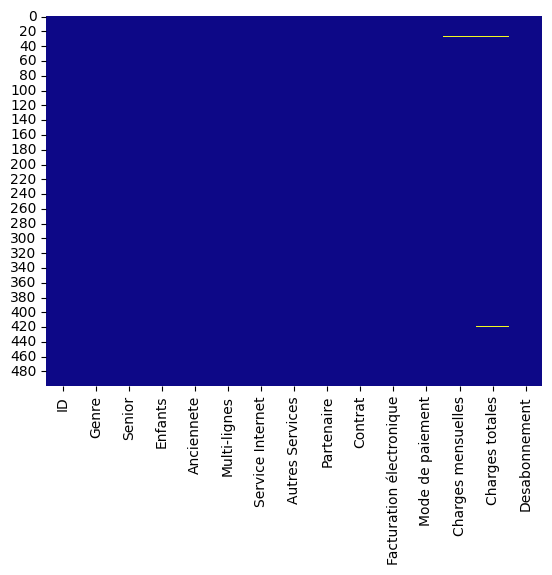

In [8]:
# Afficher une heatmap des valeurs manquantes
sns.heatmap(telecom_df.isnull(), cbar=False, cmap='plasma')

# Afficher le plot
plt.show()

## Faire imputation valeurs manquantes

In [9]:

telecom_df=telecom_df.dropna()

In [10]:
telecom_df.shape

(498, 15)

In [10]:
telecom_df[telecom_df.isnull().any(axis=1)].count()

ID                          0
Genre                       0
Senior                      0
Enfants                     0
Anciennete                  0
Multi-lignes                0
Service Internet            0
Autres Services             0
Partenaire                  0
Contrat                     0
Facturation électronique    0
Mode de paiement            0
Charges mensuelles          0
Charges totales             0
Desabonnement               0
dtype: int64

### Type de variable et encodage des variables catégorielles

In [11]:
# Afficher les types de variables pour chaque colonne
types_variables = telecom_df.dtypes
print("Types de variables :")
print(types_variables)

# Lister les variables catégorielles
variables_categorielles = telecom_df.select_dtypes(include=['object']).columns
print("\nVariables catégorielles :")
print(variables_categorielles)

Types de variables :
ID                           int64
Genre                       object
Senior                       int64
Enfants                     object
Anciennete                   int64
Multi-lignes                object
Service Internet            object
Autres Services             object
Partenaire                  object
Contrat                     object
Facturation électronique    object
Mode de paiement            object
Charges mensuelles          object
Charges totales             object
Desabonnement               object
dtype: object

Variables catégorielles :
Index(['Genre', 'Enfants', 'Multi-lignes', 'Service Internet',
       'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique',
       'Mode de paiement', 'Charges mensuelles', 'Charges totales',
       'Desabonnement'],
      dtype='object')


In [12]:
# Remplacer les virgules par des points et convertir en flottant les colonnes Charges mensuelles et Charges totales
telecom_df['Charges mensuelles'] = telecom_df['Charges mensuelles'].replace(',', '.', regex=True)
telecom_df['Charges totales'] = telecom_df['Charges totales'].replace(',', '.', regex=True)

telecom_df['Charges mensuelles'] = telecom_df['Charges mensuelles'].astype(float)
telecom_df['Charges totales'] = telecom_df['Charges totales'].astype(float)


In [14]:
types_variables = telecom_df.dtypes
print("Types de variables :")
print(types_variables)

Types de variables :
ID                            int64
Genre                        object
Senior                        int64
Enfants                      object
Anciennete                    int64
Multi-lignes                 object
Service Internet             object
Autres Services              object
Partenaire                   object
Contrat                      object
Facturation électronique     object
Mode de paiement             object
Charges mensuelles          float64
Charges totales             float64
Desabonnement                object
dtype: object


In [13]:
# Afficher les valeurs uniques dans la colonne "Genre"
unique_values_genre = telecom_df['Genre'].unique()
print(unique_values_genre)


['Femme' 'Homme']


In [14]:
# Lister les variables catégorielles
variables_categorielles = telecom_df.select_dtypes(include=['object']).columns
print("\nVariables catégorielles :")
print(variables_categorielles)


Variables catégorielles :
Index(['Genre', 'Enfants', 'Multi-lignes', 'Service Internet',
       'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique',
       'Mode de paiement', 'Desabonnement'],
      dtype='object')


## Brève explication de chaque colonne :
---

- **ID :** Identification de la ligne.

- **Genre :** Le genre du client (*Variable catégorielle nominale*).

- **Senior :** Indique si le client a 65 ans ou plus (0 pour Non, 1 pour Oui) (*Variable catégorielle binaire*).

- **Enfants :** Indique si le client a des enfants à charge (Non, Oui) (*Variable catégorielle binaire*).

- **Ancienneté :** Depuis combien de temps le client est client en mois (*Variable numérique continue*).

- **Multi-lignes :** Indique si le client a plusieurs lignes (Non, Oui) (*Variable catégorielle binaire*).

- **Service Internet :** Type de fourniture d'accès Internet du client (DSL, Fibre optique, Non) (*Variable catégorielle nominale*).

- **Autres Services :** Indique si le client dispose d'un autre service (Non, Oui) (*Variable catégorielle binaire*).

- **Partenaire :** Indique si le client a un partenaire (Non, Oui) (*Variable catégorielle binaire*).

- **Contrat :** Type de contrat (Mensuel, Annuel, etc.) (*Variable catégorielle nominale*).

- **Facturation électronique :** Indique si le client utilise la facturation électronique (Non, Oui) (*Variable catégorielle binaire*).

- **Mode de paiement :** Mode de paiement du client (Chèque électronique, Virement bancaire, etc.) (*Variable catégorielle nominale*).

- **Charges mensuelles :** Montant des frais mensuels (*Variable numérique continue*).

- **Charges totales :** Montant total des frais (*Variable numérique continue*).

- **Désabonnement :** Variable cible binaire indiquant si le client se désabonne (Non, Oui).


In [16]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Liste des variables catégorielles
variables_categorielles = ['Genre', 'Enfants', 'Multi-lignes', 'Service Internet',
       'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique',
       'Mode de paiement', 'Desabonnement']

# Créer un encodeur one-hot
onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # Assurez-vous que sparse est False

# Appliquer l'encodage one-hot aux variables catégorielles
onehot_encoded = onehot_encoder.fit_transform(telecom_df[variables_categorielles])

# Créer un DataFrame avec les nouvelles colonnes one-hot
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(variables_categorielles))

# Concaténer les nouvelles colonnes one-hot avec le DataFrame d'origine
telecom_df_encoded = pd.concat([telecom_df.drop(columns=variables_categorielles), onehot_df], axis=1)

# Afficher le DataFrame après l'encodage
print(telecom_df_encoded)

"""
variables_categorielles = ['colonne1', 'colonne2', 'colonne3']  # Remplacez par vos colonnes
# Importez les bibliothèques nécessaires

# Créez un objet OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
# Ajustez et transformez les données catégorielles
onehot_encoded = onehot_encoder.fit_transform(telecom_df[variables_categorielles])
# Créez un DataFrame avec les nouvelles colonnes one-hot
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(variables_categorielles))
# Concaténez les nouvelles colonnes one-hot avec le DataFrame d'origine
telecom_df_encoded = pd.concat([telecom_df, onehot_df], axis=1)

from sklearn.preprocessing import LabelEncoder

# Liste des variables catégorielles
variables_categorielles = ['Genre', 'Enfants', 'Multi-lignes', 'Service Internet', 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement']

# Créer une instance du LabelEncoder
label_encoder = LabelEncoder()

# Appliquer le LabelEncoder à chaque variable catégorielle
for feature in variables_categorielles:
    telecom_df[feature] = label_encoder.fit_transform(telecom_df[feature])

# Afficher le DataFrame après l'encodage
telecom_df.head(5)"""



        ID  Senior  Anciennete  Charges mensuelles  Charges totales  \
0      1.0     0.0         1.0               29.85            29.85   
1      2.0     0.0        34.0               56.95          1889.50   
2      3.0     0.0         2.0               53.85           108.15   
3      4.0     0.0        45.0               42.30          1840.75   
4      5.0     0.0         2.0               70.70           151.65   
..     ...     ...         ...                 ...              ...   
497  582.0     0.0         1.0               75.30            75.30   
498  583.0     1.0         4.0               89.20           346.20   
499  584.0     0.0         1.0               19.00            19.00   
27     NaN     NaN         NaN                 NaN              NaN   
419    NaN     NaN         NaN                 NaN              NaN   

     Genre_Homme  Enfants_Oui  Multi-lignes_Oui  Multi-lignes_Ouis  \
0            0.0          0.0               0.0                0.0   
1      

/home/alimou/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


"\nvariables_categorielles = ['colonne1', 'colonne2', 'colonne3']  # Remplacez par vos colonnes\n# Importez les bibliothèques nécessaires\n\n# Créez un objet OneHotEncoder\nonehot_encoder = OneHotEncoder(sparse=False)\n# Ajustez et transformez les données catégorielles\nonehot_encoded = onehot_encoder.fit_transform(telecom_df[variables_categorielles])\n# Créez un DataFrame avec les nouvelles colonnes one-hot\nonehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(variables_categorielles))\n# Concaténez les nouvelles colonnes one-hot avec le DataFrame d'origine\ntelecom_df_encoded = pd.concat([telecom_df, onehot_df], axis=1)\n\nfrom sklearn.preprocessing import LabelEncoder\n\n# Liste des variables catégorielles\nvariables_categorielles = ['Genre', 'Enfants', 'Multi-lignes', 'Service Internet', 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement']\n\n# Créer une instance du LabelEncoder\nlabel_encoder = LabelEncoder()\

### Normaliser / standardiser les variables numériques
---

#### Pourquoi Normaliser les Données ?

Dans notre ensemble de données, les variables numériques telles que l'ancienneté, les charges mensuels et les charges totales peuvent avoir des échelles différentes. Par exemple, l'ancienneté est mesurée en mois, tandis que les frais sont exprimés en dollars. Cela peut créer des disparités d'échelle qui peuvent affecter la performance de certains modèles d'apprentissage automatique.
Ces colonnes peuvent être considérées comme cruciales pour la prédiction du désabonnement des clients. Cependant en fonction de nos prediction on verra si on doit normaliser d'autres colonne

#### Méthode Utilisée : StandardScaler

Dans notre cas, nous utilisons la méthode `StandardScaler` pour standardiser les variables sélectionnées. Cela signifie qu'elles auront une moyenne de zéro et un écart-type de un après la transformation. Cela assure une mise à l'échelle uniforme et facilite l'interprétation des coefficients du modèle.

Vous pouvez insérer ce texte dans votre notebook pour expliquer de manière concise et accessible aux lecteurs la raison pour laquelle vous effectuez la normalisation des variables numériques dans votre projet de machine learning.


In [313]:
telecom_df_encoded=telecom_df
print(telecom_df_encoded.columns)

Index(['ID', 'Genre', 'Senior', 'Enfants', 'Anciennete', 'Multi-lignes',
       'Service Internet', 'Autres Services', 'Partenaire', 'Contrat',
       'Facturation électronique', 'Mode de paiement', 'Charges mensuelles',
       'Charges totales', 'Desabonnement'],
      dtype='object')


problèmes lors de la conversion en flottant --> message d'erreur "ValueError: could not convert string to float: '29,85'" lors de l'application de la méthode fit_transform du StandardScaler.
Solution : Avant d'appliquer la normalisation, remplacer les virgules par des points dans les colonnes numériques. Cela peut être fait en utilisant la méthode replace de pandas.

In [314]:
numerical_features = ['Anciennete', 'Charges mensuelles', 'Charges totales']
scaler = StandardScaler()
telecom_df_encoded[numerical_features] = scaler.fit_transform(telecom_df_encoded[numerical_features])



## Analyse Exploratoire des Données (EDA) après prétraitement
---

In [315]:
telecom_df_encoded

,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation électronique,Mode de paiement,Charges mensuelles,Charges totales,Desabonnement
0,1,0,0,0,-1.262273,0,0,0,1,2,1,1,-1.260110,-1.008238,Non
1,2,1,0,0,0.085015,0,0,1,0,0,0,2,-0.344588,-0.189309,Non
2,3,1,0,0,-1.221446,0,0,1,0,2,1,2,-0.449315,-0.973757,Oui
3,4,1,0,0,0.534111,0,0,0,0,0,0,3,-0.839510,-0.210777,Non
4,5,0,0,0,-1.221446,0,1,1,0,2,1,1,0.119930,-0.954601,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,579,1,1,0,0.125842,1,1,1,1,2,1,1,0.925657,0.460630,Non
496,581,0,0,1,-0.813177,0,2,1,1,2,0,2,-1.626657,-0.918535,Oui
497,582,0,0,0,-1.262273,0,1,1,0,2,0,2,0.275332,-0.988223,Oui
498,583,0,1,0,-1.139792,1,1,1,0,2,1,1,0.744918,-0.868928,Oui


In [316]:
# Explorer les statistiques descriptives après le prétraitement
descriptive_stats_after_preprocessing = telecom_df_encoded.describe()
descriptive_stats_after_preprocessing

,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation électronique,Mode de paiement,Charges mensuelles,Charges totales
count,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02
mean,291.919679,0.508032,0.176707,0.319277,-9.630850e-17,0.421687,0.849398,0.907631,0.502008,1.339357,0.596386,1.497992,2.853585e-16,1.070094e-17
std,169.531268,0.500438,0.381804,0.466665,1.001006e+00,0.498379,0.714474,0.289838,0.500499,0.806972,0.491115,1.069514,1.001006e+00,1.001006e+00
min,1.000000,0.000000,0.000000,0.000000,-1.262273e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.628346e+00,-1.013016e+00
25%,143.500000,0.000000,0.000000,0.000000,-9.662777e-01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-7.525189e-01,-8.230747e-01
50%,293.500000,1.000000,0.000000,0.000000,-1.599464e-01,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.288806e-01,-4.064760e-01
75%,437.750000,1.000000,0.000000,1.000000,9.423800e-01,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,8.120616e-01,6.723968e-01
max,584.000000,1.000000,1.000000,1.000000,1.636437e+00,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.651994e+00,2.707737e+00


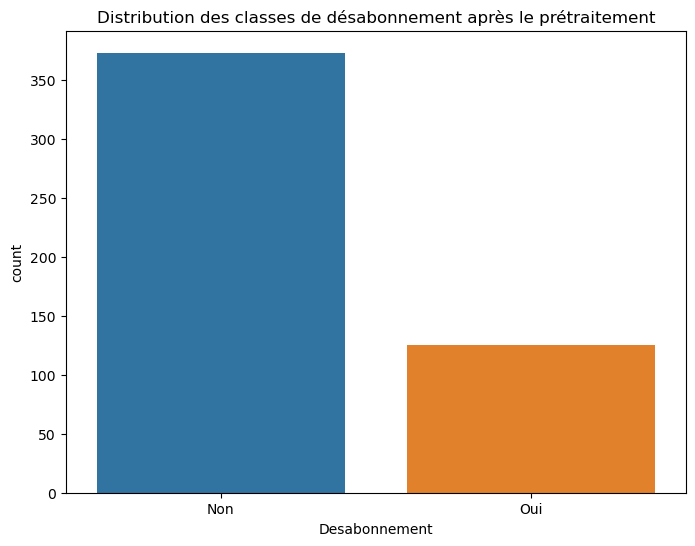

In [317]:
# Visualiser la distribution des classes de désabonnement après le prétraitement
plt.figure(figsize=(8, 6))
sns.countplot(x='Desabonnement', data=telecom_df)
plt.title('Distribution des classes de désabonnement après le prétraitement')
plt.show()

In [318]:
# Compter le nombre de NaN dans chaque colonne
nan_count_per_column = telecom_df_encoded.isna().sum()

# Afficher le nombre de NaN dans chaque colonne
print(nan_count_per_column)


ID                          0
Genre                       0
Senior                      0
Enfants                     0
Anciennete                  0
Multi-lignes                0
Service Internet            0
Autres Services             0
Partenaire                  0
Contrat                     0
Facturation électronique    0
Mode de paiement            0
Charges mensuelles          0
Charges totales             0
Desabonnement               0
dtype: int64


In [319]:
# Compter le nombre total de NaN dans le DataFrame
total_nan_count = nan_count_per_column.sum()

# Afficher le nombre total de NaN
print("Nombre total de NaN dans le DataFrame :", total_nan_count)


Nombre total de NaN dans le DataFrame : 0


## Visualizing relationships

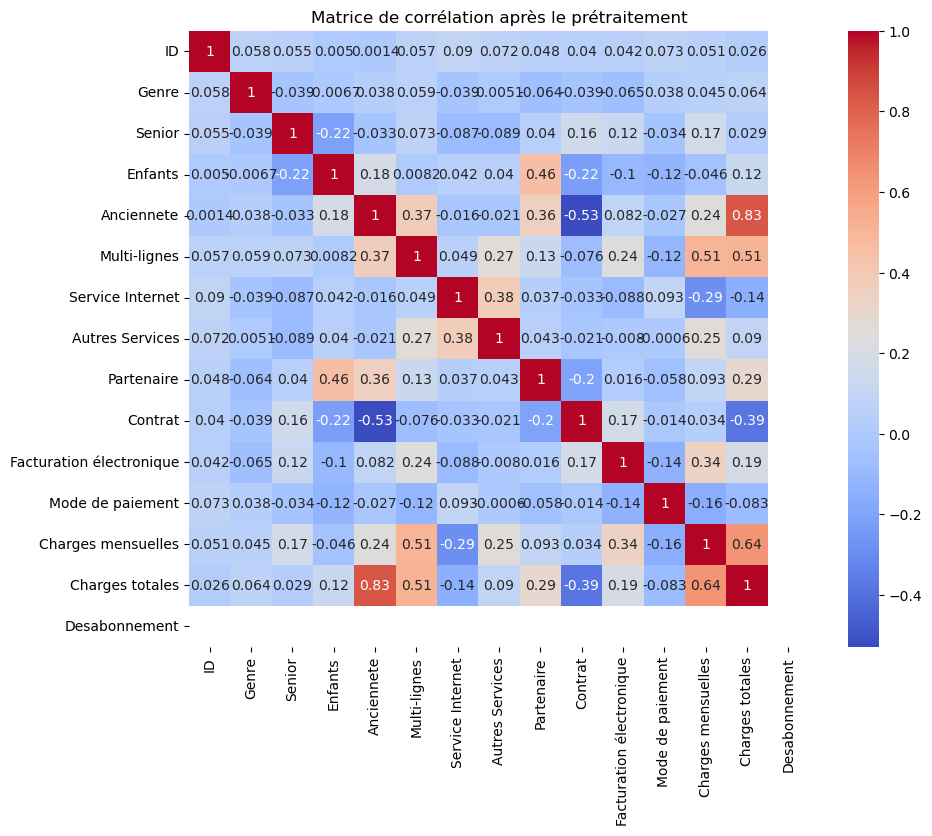

In [320]:
# Convertir toutes les colonnes en float64
telecom_df_encoded = telecom_df_encoded.apply(pd.to_numeric, errors='coerce')

# Remplacer les valeurs NaN par 0
telecom_df_encoded = telecom_df_encoded.fillna(0)

# Identifier les tendances et corrélations entre les caractéristiques après le prétraitement
correlation_matrix_after_preprocessing = telecom_df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after_preprocessing, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation après le prétraitement')
plt.show()


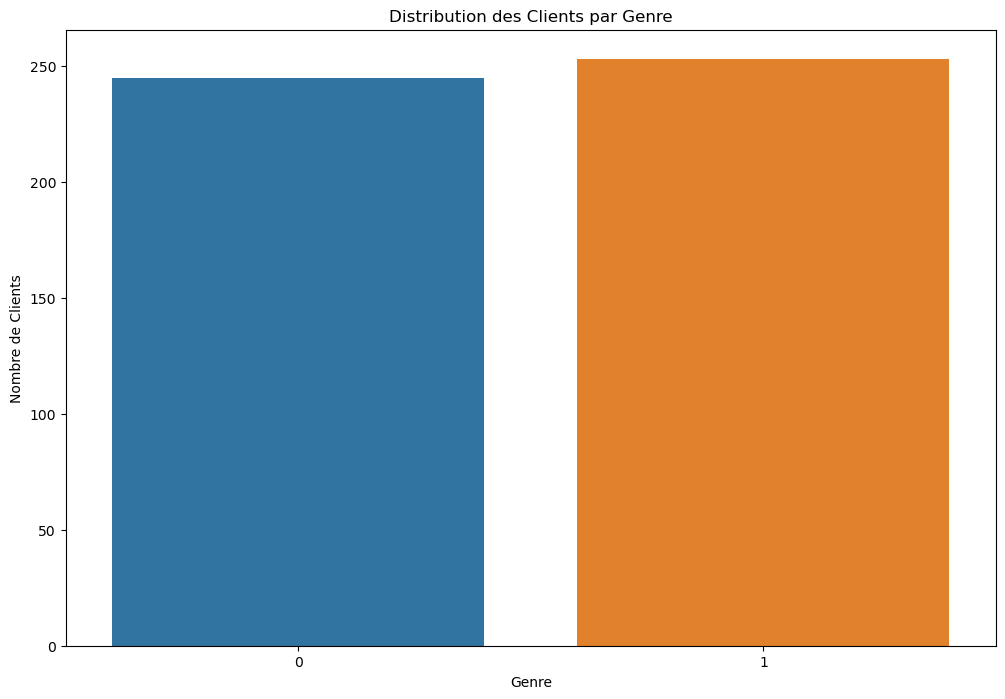

In [321]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Genre', data=telecom_df_encoded)
plt.title('Distribution des Clients par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.show()


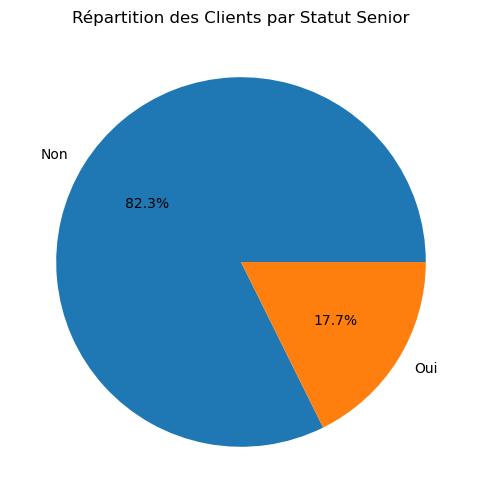

In [322]:
plt.figure(figsize=(10, 6))
telecom_df_encoded['Senior'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non', 'Oui'])
plt.title('Répartition des Clients par Statut Senior')
plt.ylabel('')  # Supprimer le libellé par défaut
plt.show()


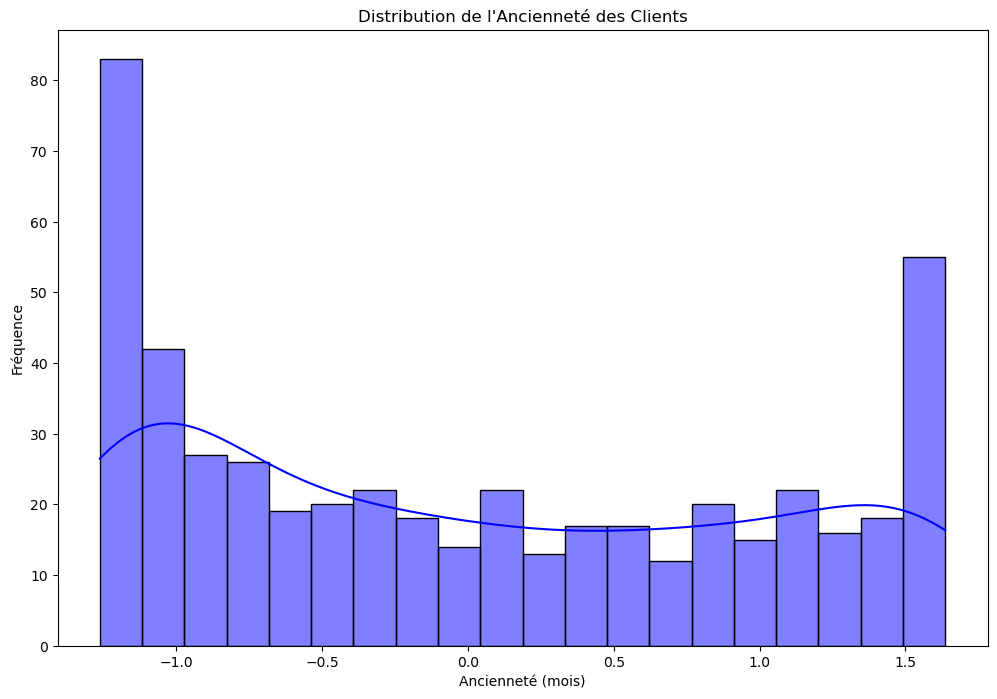

In [323]:
plt.figure(figsize=(12, 8))
sns.histplot(telecom_df_encoded['Anciennete'], bins=20, kde=True, color='blue')
plt.title('Distribution de l\'Ancienneté des Clients')
plt.xlabel('Ancienneté (mois)')
plt.ylabel('Fréquence')
plt.show()


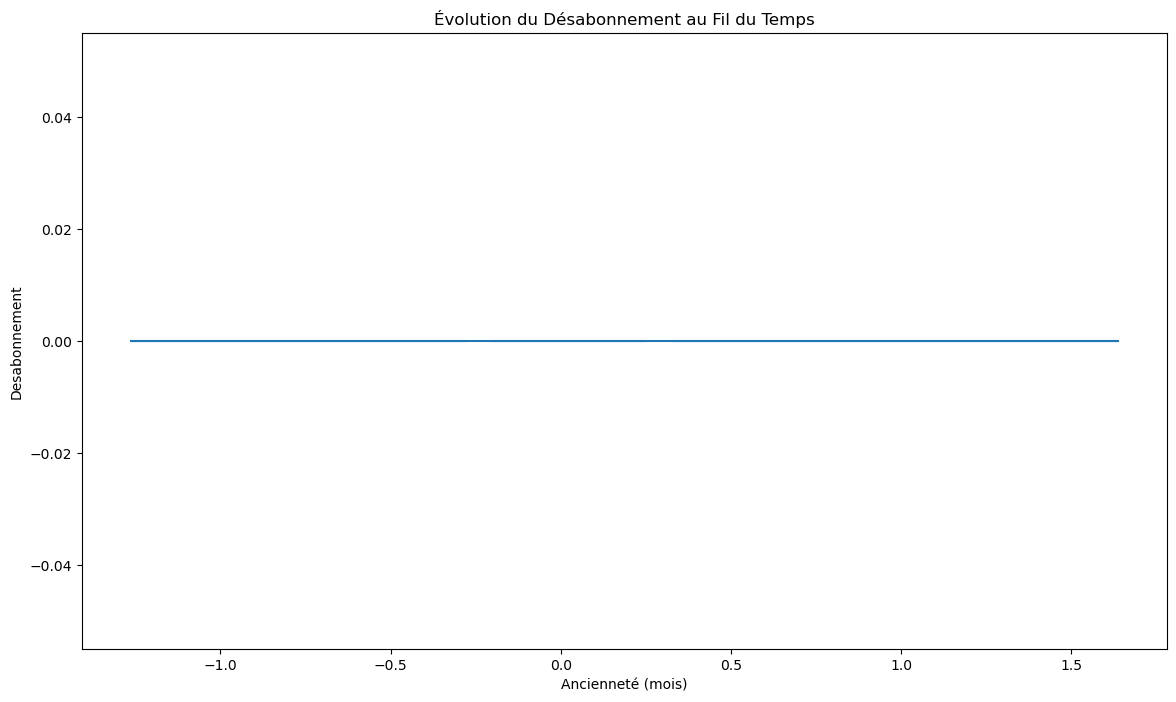

In [324]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Anciennete', y='Desabonnement', data=telecom_df_encoded)
plt.title('Évolution du Désabonnement au Fil du Temps')
plt.xlabel('Ancienneté (mois)')
plt.show()


/home/grace/anaconda3/envs/EnvChurnGuardML/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


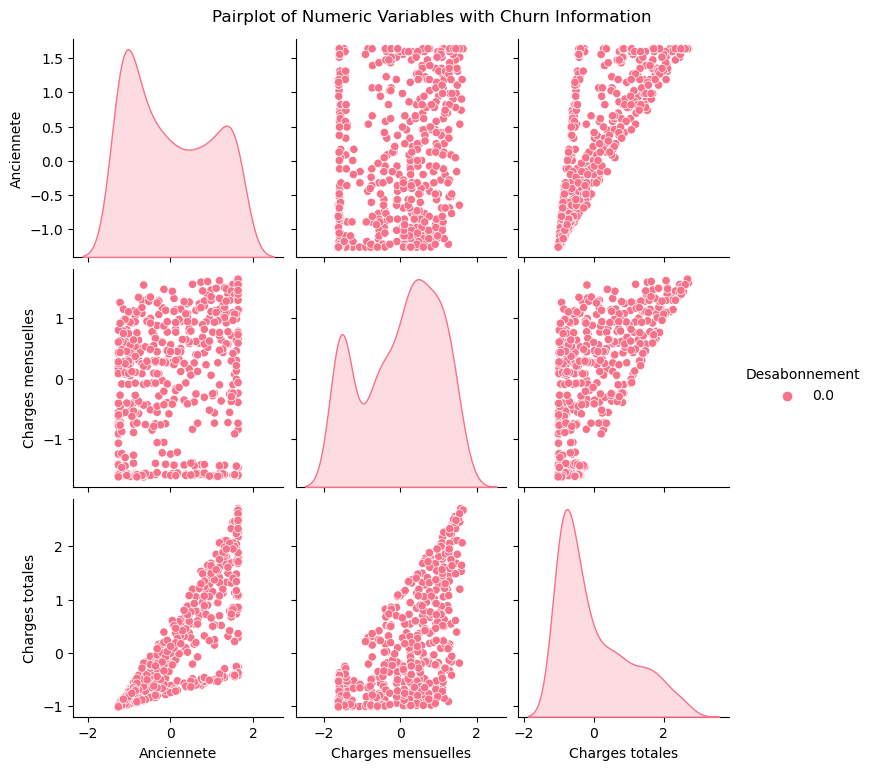

In [325]:
# Numeric columns for pairplot
numeric_columns = ['Anciennete', 'Charges mensuelles', 'Charges totales']

# Add 'Desabonnement' for hue
numeric_columns.append('Desabonnement')

# Create pairplot
sns.pairplot(telecom_df_encoded[numeric_columns], hue='Desabonnement', palette='husl')
plt.suptitle('Pairplot of Numeric Variables with Churn Information', y=1.02)
plt.show()


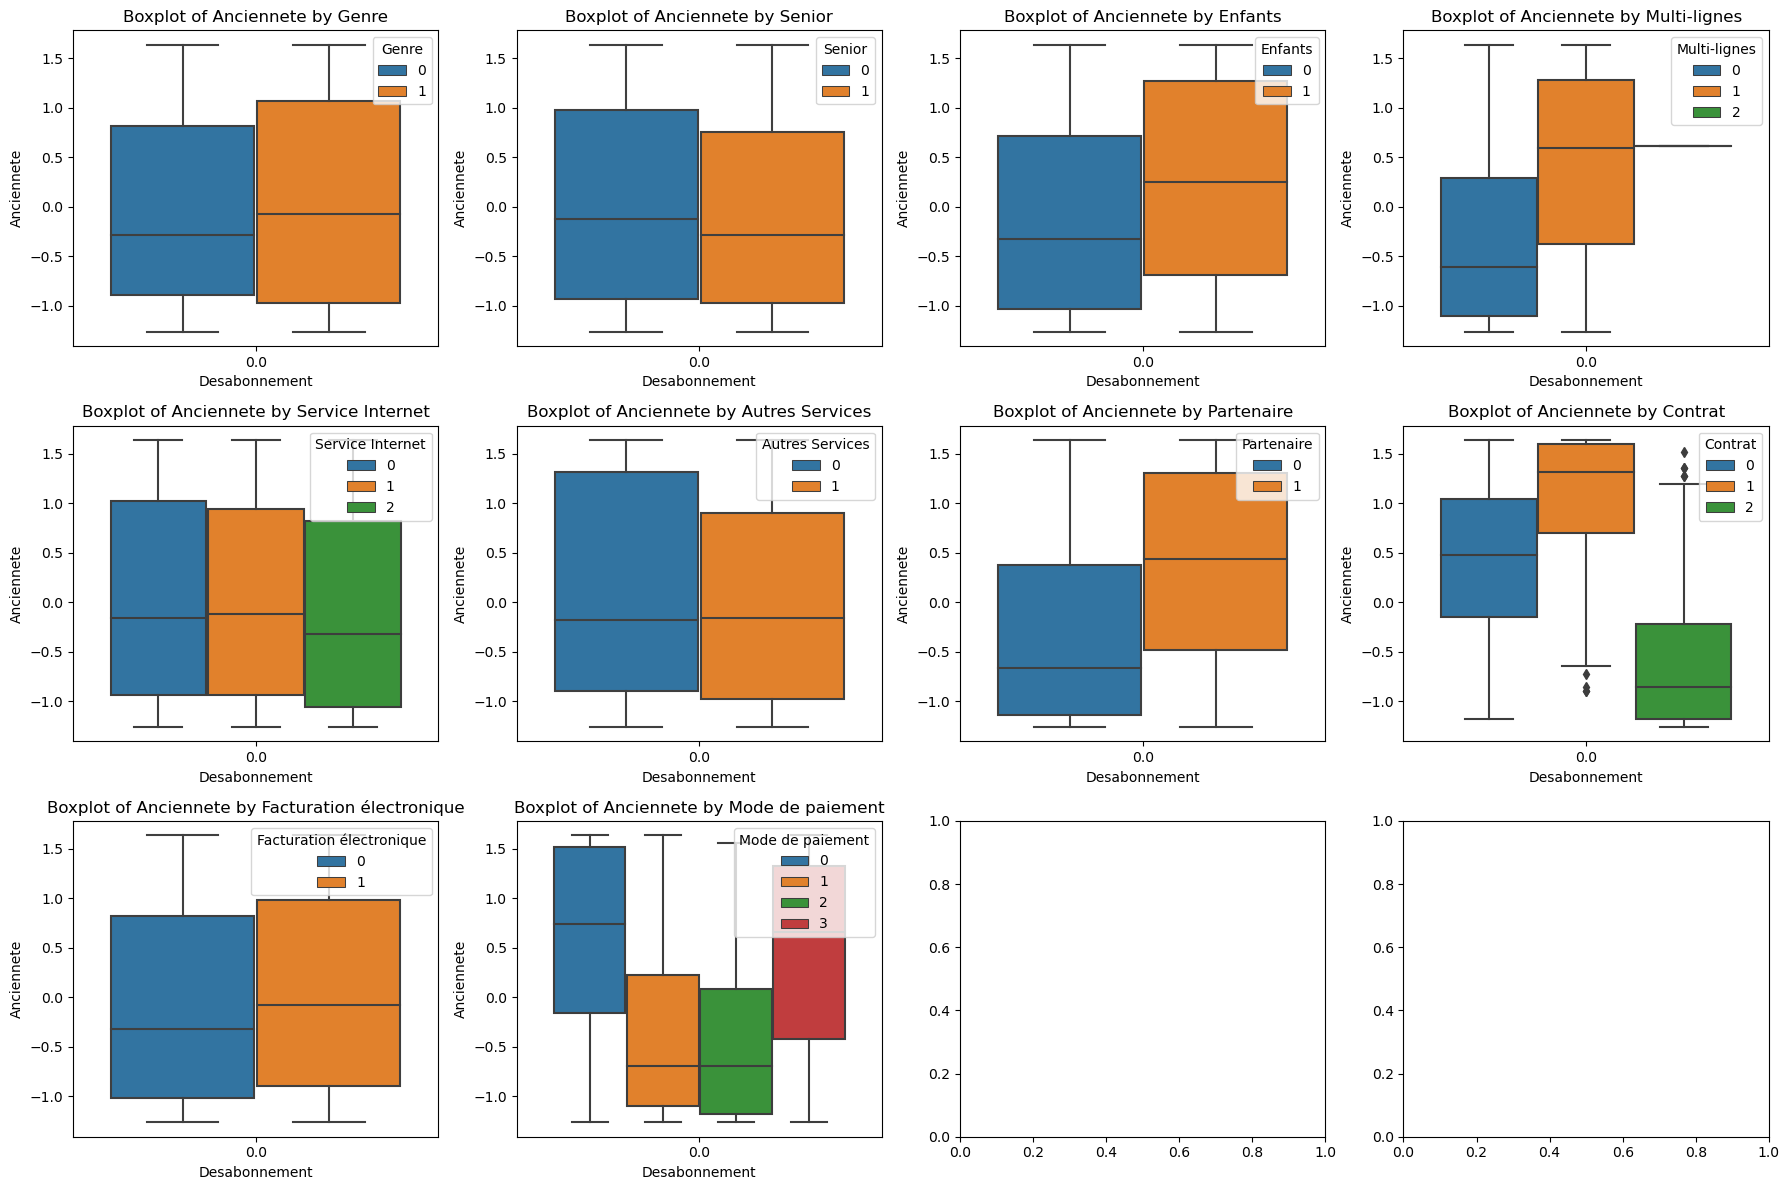

In [326]:
# Categorical columns for box plots
categorical_columns = ['Genre', 'Senior', 'Enfants', 'Multi-lignes', 'Service Internet', 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement']

# Create box plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
for i, col in enumerate(categorical_columns):
    sns.boxplot(x='Desabonnement', y='Anciennete', data=telecom_df_encoded, hue=col, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Boxplot of Anciennete by {col}')
    axes[i//4, i%4].legend(title=col, loc='upper right')

plt.tight_layout()
plt.show()


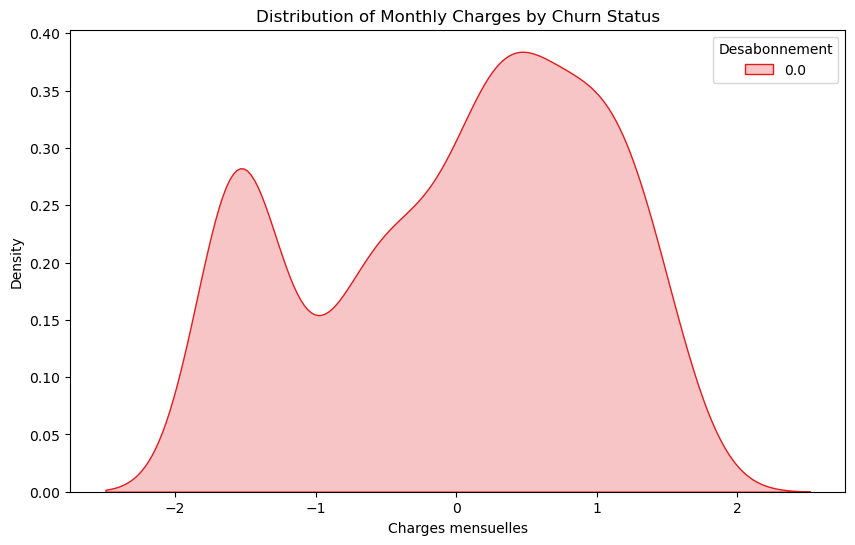

In [327]:
# Distribution of Monthly Charges
plt.figure(figsize=(10, 6))
sns.kdeplot(data=telecom_df_encoded, x='Charges mensuelles', hue='Desabonnement', common_norm=False, fill=True, palette='Set1')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.show()


In [328]:
telecom_df_encoded_corr=telecom_df_encoded.corr()

In [329]:
telecom_df_encoded_corr

,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation électronique,Mode de paiement,Charges mensuelles,Charges totales,Desabonnement
ID,1.000000,0.058444,0.055427,0.004979,0.001374,0.056579,0.089934,0.072000,0.048187,0.040365,0.041998,0.072685,0.050666,0.025838,NaN
Genre,0.058444,1.000000,-0.039035,-0.006695,0.038180,0.058999,-0.038815,0.005125,-0.064330,-0.039148,-0.064557,0.037623,0.044819,0.064440,NaN
Senior,0.055427,-0.039035,1.000000,-0.215650,-0.033478,0.072872,-0.086645,-0.088575,0.040257,0.157623,0.123595,-0.033621,0.165130,0.029246,NaN
Enfants,0.004979,-0.006695,-0.215650,1.000000,0.182375,0.008234,0.041915,0.039968,0.458131,-0.218835,-0.103817,-0.121669,-0.045887,0.118120,NaN
Anciennete,0.001374,0.038180,-0.033478,0.182375,1.000000,0.368397,-0.015641,-0.020892,0.360490,-0.528919,0.082288,-0.026517,0.243701,0.834340,NaN
Multi-lignes,0.056579,0.058999,0.072872,0.008234,0.368397,1.000000,0.048745,0.270194,0.133728,-0.076370,0.236415,-0.115428,0.507543,0.512533,NaN
Service Internet,0.089934,-0.038815,-0.086645,0.041915,-0.015641,0.048745,1.000000,0.379639,0.037421,-0.033321,-0.087568,0.093079,-0.289520,-0.144633,NaN
Autres Services,0.072000,0.005125,-0.088575,0.039968,-0.020892,0.270194,0.379639,1.000000,0.042892,-0.020556,-0.008004,-0.000600,0.249494,0.089533,NaN
Partenaire,0.048187,-0.064330,0.040257,0.458131,0.360490,0.133728,0.037421,0.042892,1.000000,-0.203451,0.015582,-0.058255,0.093495,0.292884,NaN
Contrat,0.040365,-0.039148,0.157623,-0.218835,-0.528919,-0.076370,-0.033321,-0.020556,-0.203451,1.000000,0.173686,-0.014362,0.034366,-0.385203,NaN


<Axes: >

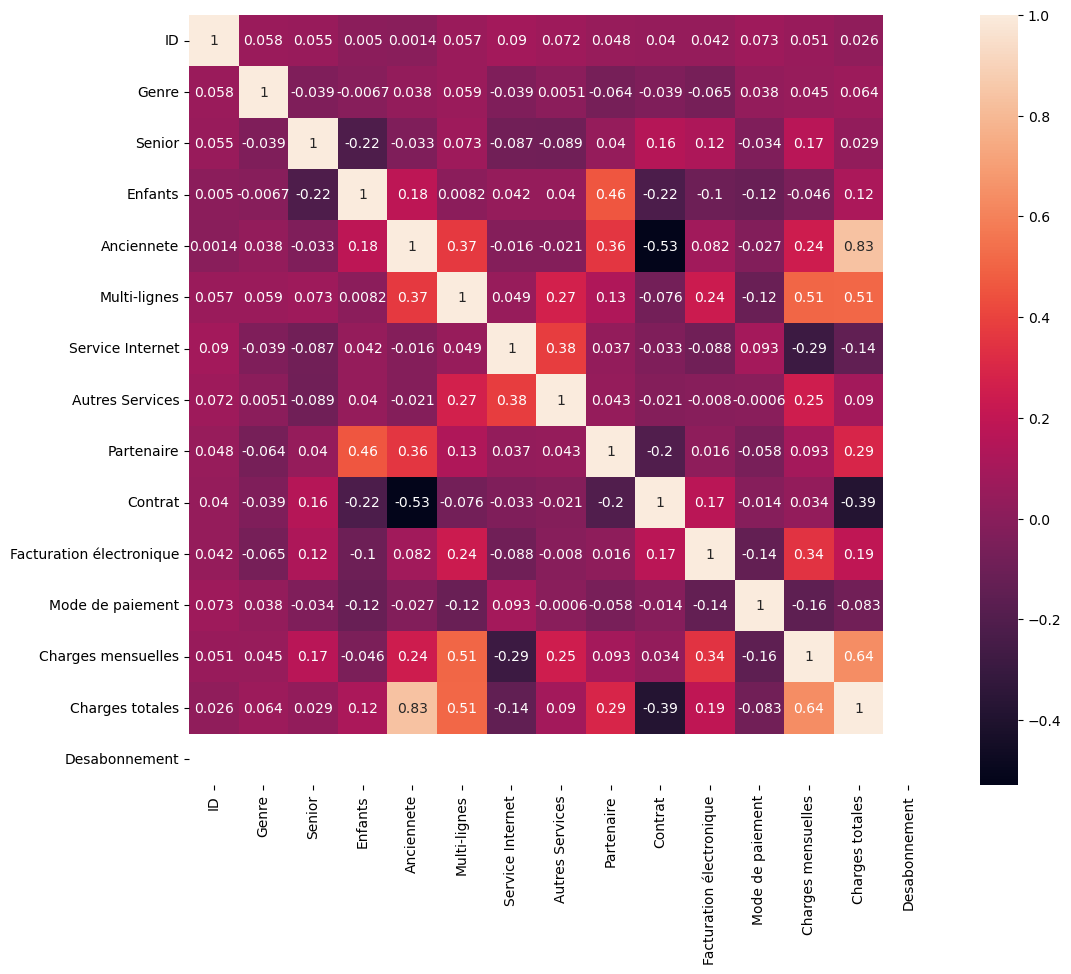

In [330]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(telecom_df_encoded_corr, annot=True)

In [332]:

telecom_df_encoded.to_csv('../datasets/telecom_data_clean.csv', index=False)


In [2]:
!ls ../datasets

Telecom-Data-1.csv  telecom_data_clean.csv
